In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

mpl.rcParams['font.size'] = 12
mpl.rcParams['figure.figsize'] = (12,5)

In [2]:
file_path = "./PartA"
file_list = os.listdir(file_path)

In [3]:
file_list

['DistGrowth_HighStockingRate.xls',
 'DistGrowth_LowStockingRate.xls',
 'DistGrowth_MediumStockingRate.xls']

In [4]:
cases = []
for filename in file_list:
    case = filename[11: -4]
    cases.append(case)
cases

['HighStockingRate', 'LowStockingRate', 'MediumStockingRate']

In [5]:
df_list = []
for i in range(3):
    ratename = cases[i]
    if ratename == 'HighStockingRate':
        num_skiprows = 12
    else:
        num_skiprows = 10

    df_temp = pd.read_excel(file_path + '/' + file_list[i], skiprows=num_skiprows)
    df_temp = df_temp.loc[:, [df_temp.columns[1], df_temp.columns[5]] ]
    df_temp.columns = [ratename+'_date', ratename]
    df_list.append(df_temp)
    

In [7]:
df = pd.concat(df_list, axis=1)
df

,HighStockingRate_date,HighStockingRate,LowStockingRate_date,LowStockingRate,MediumStockingRate_date,MediumStockingRate
0,10/01/2013,NaN,10/01/2013,NaN,10/01/2013,NaN
1,18/02/2013,NaN,18/02/2013,NaN,18/02/2013,NaN
2,04/03/2013,7.0,04/03/2013,17.0,04/03/2013,12.0
3,11/03/2013,23.0,11/03/2013,23.0,11/03/2013,15.0
4,15/03/2013,20.0,15/03/2013,28.0,15/03/2013,16.0
...,...,...,...,...,...,...
93,15/06/2015,88.0,15/06/2015,83.0,15/06/2015,89.0
94,22/06/2015,71.0,22/06/2015,90.0,22/06/2015,67.0
95,29/06/2015,49.0,29/06/2015,60.0,29/06/2015,54.0
96,06/07/2015,65.0,06/07/2015,76.0,06/07/2015,75.0


In [8]:
df.columns

Index(['HighStockingRate_date', 'HighStockingRate', 'LowStockingRate_date',
       'LowStockingRate', 'MediumStockingRate_date', 'MediumStockingRate'],
      dtype='object')

In [9]:
df.drop(['LowStockingRate_date', 'MediumStockingRate_date'], axis=1, inplace=True)
df.fillna(0, inplace=True)

In [10]:
df.head()

,HighStockingRate_date,HighStockingRate,LowStockingRate,MediumStockingRate
0,10/01/2013,0.0,0.0,0.0
1,18/02/2013,0.0,0.0,0.0
2,04/03/2013,7.0,17.0,12.0
3,11/03/2013,23.0,23.0,15.0
4,15/03/2013,20.0,28.0,16.0


[datetime格式官方链接](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior)

In [11]:
# Convert date date to time index by pd.to_datetime()
df.set_index(pd.to_datetime(df["HighStockingRate_date"], format='%d/%m/%Y'), inplace= True)

In [12]:
df

,HighStockingRate_date,HighStockingRate,LowStockingRate,MediumStockingRate
HighStockingRate_date,,,,
2013-01-10,10/01/2013,0.0,0.0,0.0
2013-02-18,18/02/2013,0.0,0.0,0.0
2013-03-04,04/03/2013,7.0,17.0,12.0
2013-03-11,11/03/2013,23.0,23.0,15.0
2013-03-15,15/03/2013,20.0,28.0,16.0
...,...,...,...,...
2015-06-15,15/06/2015,88.0,83.0,89.0
2015-06-22,22/06/2015,71.0,90.0,67.0
2015-06-29,29/06/2015,49.0,60.0,54.0


In [13]:
df.drop("HighStockingRate_date", axis=1, inplace=True)

In [14]:
df.head()

,HighStockingRate,LowStockingRate,MediumStockingRate
HighStockingRate_date,,,
2013-01-10,0.0,0.0,0.0
2013-02-18,0.0,0.0,0.0
2013-03-04,7.0,17.0,12.0
2013-03-11,23.0,23.0,15.0
2013-03-15,20.0,28.0,16.0


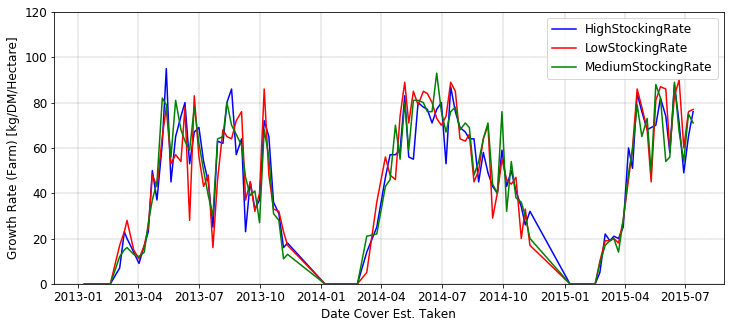

In [15]:
# Plot the HighStockingRate
fig1, ax1 = plt.subplots()

ax1.plot(df.index, df.HighStockingRate, label = df.columns[0], color='b')
ax1.plot(df.index, df.LowStockingRate, label = df.columns[1], color='r')
ax1.plot(df.index, df.MediumStockingRate, label = df.columns[2], color='g')

ax1.set_xlabel('Date Cover Est. Taken')
ax1.set_ylabel('Growth Rate (Farm) [kg/DM/Hectare]')
ax1.set_ylim(0,120)
ax1.legend(loc=1)
ax1.grid(color='k', linestyle='--', linewidth=0.2)

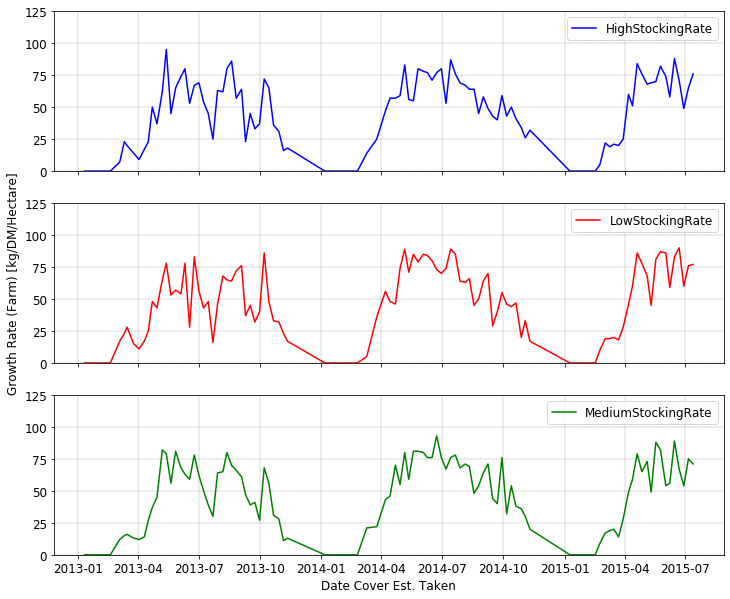

In [16]:
fig4, [ax1, ax2, ax3] = plt.subplots(3, 1, sharex='col', figsize=(12, 10))

ax1.plot(df.index, df.HighStockingRate, label = df.columns[0], color='b')
ax2.plot(df.index, df.LowStockingRate, label = df.columns[1], color='r')
ax3.plot(df.index, df.MediumStockingRate, label = df.columns[2], color='g')

ax3.set_xlabel('Date Cover Est. Taken')
ax2.set_ylabel('Growth Rate (Farm) [kg/DM/Hectare]')
for ax in [ax1, ax2, ax3]:
    ax.legend(loc='upper right')
    ax.set_ylim(0, 125)
    ax.set_yticks(np.arange(0, 150,25))
    ax.grid(color='k', linestyle='--', linewidth=0.2)
ax3.legend()